<a href="https://colab.research.google.com/github/rupamkr12/Lukemia-Detetection-Enhancement/blob/main/major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

source_folder_path = '/content/drive/MyDrive/MAJOR/im1'

destination_folder_path = '/content/im1'

shutil.copytree(source_folder_path, destination_folder_path)

file_names = os.listdir(destination_folder_path)

In [ ]:
# main.py

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
if not os.path.exists("im"):
    os.makedirs("im")
# Function to perform contrast stretching
def pixelVal(pix, r1, s1, r2, s2):
    if 0 <= pix <= r1:
        return (s1 / r1) * pix
    elif r1 < pix <= r2:
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2


r1 = 70
s1 = 0
r2 = 200
s2 = 255

pixelVal_vec = np.vectorize(pixelVal)

# Create a list of image files in the "im" folder
image_files = [filename for filename in os.listdir("im") if filename.endswith(".jpg")]

# Create output folders for each type of processed image
output_folders = [
    "Gray", "Median", "Gaussian", "HSV", "claheNorm", "contrast_stretched",
    "contrast_stretched_blurM", "edge", "edgeM", "edgeG",
    "Line-Segment-Labeling with WBC Marked", "Ground Truth by Labelme with WBC Colored",
    "HSV Image with WBC Identified", "Binary Ground Truth with WBC Highlighted",
    "Pixel-wise CDW Weight Map with Enhanced WBC Contrast", "Clear distinguish between RBC and WBC", "labelme_json_to_ground_truth"
]

for folder in output_folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

for i, image_file in enumerate(image_files):
    # Read original image
    image = cv2.imread(os.path.join("im", image_file))

    # Convert to grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median filter for smoothing
    blurM = cv2.medianBlur(gray, 5)

    # Apply Gaussian filter for smoothing
    blurG = cv2.GaussianBlur(gray, (9, 9), 0)

    # Convert the image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Histogram equalization
    histoNorm = cv2.equalizeHist(gray)

    # Create a CLAHE object for Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    claheNorm = clahe.apply(gray)

    # Apply contrast stretching
    contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
    contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

    # Edge detection using Canny edge detector
    edge = cv2.Canny(gray, 100, 200)
    edgeG = cv2.Canny(blurG, 100, 200)
    edgeM = cv2.Canny(blurM, 100, 200)

    # WBC identification and coloring
    colored_image = cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)
    filled_image = image.copy()
    mask = np.zeros_like(gray)

    contours, _ = cv2.findContours(edgeM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    colors = [(255, 192, 203), (255, 255, 0), (255, 0, 0), (0, 0, 255), (0, 255, 0)]  # Pink, Yellow, Red, Blue, Green

    for j, contour in enumerate(contours):
        color = colors[j % len(colors)]
        cv2.drawContours(colored_image, [contour], -1, color, -1)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        cv2.drawContours(filled_image, [contour], -1, color, -1)

    filled_image[np.where(mask == 0)] = [255, 255, 255]  # Filling outside area with white color

    # Save the processed images to their respective folders
    cv2.imwrite(os.path.join("Gray", f"Gray_{i}_1.png"), gray)
    cv2.imwrite(os.path.join("Median", f"Median_{i}_1.png"), blurM)
    cv2.imwrite(os.path.join("Gaussian", f"Gaussian_{i}_1.png"), blurG)
    cv2.imwrite(os.path.join("HSV", f"HSV_{i}_1.png"), hsv_image)
    cv2.imwrite(os.path.join("claheNorm", f"claheNorm_{i}_1.png"), claheNorm)
    cv2.imwrite(os.path.join("contrast_stretched", f"contrast_stretched_{i}_1.png"), contrast_stretched)
    cv2.imwrite(os.path.join("contrast_stretched_blurM", f"contrast_stretched_blurM_{i}_1.png"), contrast_stretched_blurM)
    cv2.imwrite(os.path.join("edge", f"edge_{i}_1.png"), edge)
    cv2.imwrite(os.path.join("edgeM", f"edgeM_{i}_1.png"), edgeM)
    cv2.imwrite(os.path.join("edgeG", f"edgeG_{i}_1.png"), edgeG)


    cv2.imwrite(os.path.join("Line-Segment-Labeling with WBC Marked", f"line_segment_{i}_1.png"), edgeM)
    cv2.imwrite(os.path.join("Ground Truth by Labelme with WBC Colored", f"ground_{i}_1.png"), colored_image)
    cv2.imwrite(os.path.join("HSV Image with WBC Identified", f"HSV_{i}_1.png"), hsv_image)
    cv2.imwrite(os.path.join("Binary Ground Truth with WBC Highlighted", f"Binary_{i}_1.png"), histoNorm)
    # Apply 'seismic' colormap using Matplotlib and save the processed images
    # Apply 'seismic' colormap and save the processed images
    cv2.imwrite(os.path.join("Pixel-wise CDW Weight Map with Enhanced WBC Contrast", f"Pixel_wise_{i}_1.png"), cv2.applyColorMap(edge, cv2.COLORMAP_JET))
    plt.imsave(os.path.join("Clear distinguish between RBC and WBC", f"distinguish_{i}_1.png"), gray, cmap='seismic')

# No need to plot the images, as they are now saved in the specified folders.


In [ ]:
# code_extract1.py

import cv2
import numpy as np
import os
import random

def preprocess_and_segment_cells(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            input_image_path = os.path.join(input_folder, filename)

            # Step 1: Read the image
            original_image = cv2.imread(input_image_path)

            # Step 2: Enhance the image (contrast enhancement using histogram equalization)
            enhanced_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
            enhanced_image = cv2.equalizeHist(enhanced_image)

            # Step 3: Convert to HSV
            hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

            # Step 4: Set Color Threshold Range for cell detection (adjust these values)
            lower_limit = np.array([min_hue, min_saturation, min_value])
            upper_limit = np.array([max_hue, max_saturation, max_value])

            # Step 5: Extract cells
            cell_mask = cv2.inRange(hsv_image, lower_limit, upper_limit)

            # Apply Morphological Opening to remove noise
            kernel_opening = np.ones((5, 5), np.uint8)
            opening = cv2.morphologyEx(cell_mask, cv2.MORPH_OPEN, kernel_opening)

            # Apply Morphological Closing to fill gaps
            kernel_closing = np.ones((10, 10), np.uint8)
            closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_closing)

            # Step 6: Find Contours
            contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Initialize a counter for saved cells
            cell_count = 0

            # Step 7: Process Contours and save detected cells
            for i, contour in enumerate(contours):
                area = cv2.contourArea(contour)
                if area > min_cell_area and area < max_cell_area:
                    # Check if the contour is approximately circular
                    perimeter = cv2.arcLength(contour, True)
                    circularity = 4 * np.pi * (area / (perimeter * perimeter))
                    if circularity > min_circularity or area > min_cell_area * 2:
                        x, y, w, h = cv2.boundingRect(contour)
                        cell = original_image[y:y+h, x:x+w]

                        # Save the detected cell
                        for _ in range(random.randint(1, 4)):  # Generate multiple augmented images
                            cell_image_path = os.path.join(output_folder, f'Cell_{cell_count}.png')
                            cv2.imwrite(cell_image_path, cell)
                            cell_count += 1
                            # Apply transformations to generate additional variations
                            for angle in [0, 90, 180, 270]:
                                rotated_cell = np.rot90(cell, k=angle // 90)
                                cv2.imwrite(os.path.join(output_folder, f'Cell_{cell_count}.png'), rotated_cell)
                                cell_count += 1
                                flipped_cell = cv2.flip(rotated_cell, 0)
                                cv2.imwrite(os.path.join(output_folder, f'Cell_{cell_count}.png'), flipped_cell)
                                cell_count += 1

                            if cell_count >= 1000:
                                break

                if cell_count >= 1000:
                    break

if __name__ == "_main_":
    input_folder = 'im1'  # Replace with the path to the folder containing your dataset
    output_folder = 'OUTPUT_SEGMENTED'  # Replace with the path for saving the detected cells

    min_hue = 90  # Adjust these threshold values based on your dataset
    max_hue = 160
    min_saturation = 50
    max_saturation = 255
    min_value = 50
    max_value = 255
    min_cell_area = 50  # Adjust as needed
    max_cell_area = 40000  # Adjust as needed
    min_circularity = 0.05  # Adjust as needed

    preprocess_and_segment_cells(input_folder, output_folder)


In [ ]:
# code_extract.py

import cv2
import numpy as np
import os
import random

def preprocess_and_segment_cells(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            input_image_path = os.path.join(input_folder, filename)

            # Step 1: Read the image
            original_image = cv2.imread(input_image_path)

            # Step 2: Enhance the image (contrast enhancement using histogram equalization)
            enhanced_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
            enhanced_image = cv2.equalizeHist(enhanced_image)

            # Step 3: Convert to HSV
            hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

            # Step 4: Set Color Threshold Range for cell detection (adjust these values)
            lower_limit = np.array([min_hue, min_saturation, min_value])
            upper_limit = np.array([max_hue, max_saturation, max_value])

            # Step 5: Extract cells
            cell_mask = cv2.inRange(hsv_image, lower_limit, upper_limit)

            # Apply Morphological Opening to remove noise
            kernel_opening = np.ones((5, 5), np.uint8)
            opening = cv2.morphologyEx(cell_mask, cv2.MORPH_OPEN, kernel_opening)

            # Apply Morphological Closing to fill gaps
            kernel_closing = np.ones((10, 10), np.uint8)
            closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_closing)

            # Step 6: Find Contours
            contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Initialize a counter for saved cells
            cell_count = 0

            # Step 7: Process Contours and save detected cells
            for i, contour in enumerate(contours):
                area = cv2.contourArea(contour)
                if area > min_cell_area and area < max_cell_area:
                    # Check if the contour is approximately circular
                    perimeter = cv2.arcLength(contour, True)
                    circularity = 4 * np.pi * (area / (perimeter * perimeter))
                    if circularity > min_circularity or area > min_cell_area * 2:
                        x, y, w, h = cv2.boundingRect(contour)
                        cell = original_image[y:y+h, x:x+w]

                        # Save the detected cell
                        for _ in range(random.randint(1, 3)):  # Generate multiple augmented images
                            cell_image_path = os.path.join(output_folder, f'Cell_{cell_count}.png')
                            cv2.imwrite(cell_image_path, cell)
                            cell_count += 1
                            # Apply transformations to generate additional variations
                            for angle in [0, 90, 180, 270]:
                                rotated_cell = np.rot90(cell, k=angle // 90)
                                cv2.imwrite(os.path.join(output_folder, f'Cell_{cell_count}.png'), rotated_cell)
                                cell_count += 1
                                flipped_cell = cv2.flip(rotated_cell, 0)
                                cv2.imwrite(os.path.join(output_folder, f'Cell_{cell_count}.png'), flipped_cell)
                                cell_count += 1

if __name__ == "_main_":
    input_folder = 'im1'  # Replace with the path to the folder containing your dataset
    output_folder = 'OUTPUT_SEGMENTED'  # Replace with the path for saving the detected cells

    min_hue = 90  # Adjust these threshold values based on your dataset
    max_hue = 160
    min_saturation = 50
    max_saturation = 255
    min_value = 50
    max_value = 255
    min_cell_area = 100  # Adjust as needed
    max_cell_area = 25000  # Adjust as needed
    min_circularity = 0.1  # Adjust as needed

    preprocess_and_segment_cells(input_folder, output_folder)


In [ ]:
# code_detect.py

import cv2
import numpy as np
import os

def filter_out_interference_factors(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            # Step 1: Median Blur
            original_image = cv2.imread(input_image_path)
            median_blurred = cv2.medianBlur(original_image, 25)

            # Step 2: Convert to HSV
            hsv_image = cv2.cvtColor(median_blurred, cv2.COLOR_BGR2HSV)
            hsv_image_path = os.path.join(output_folder, f"hsv_{filename}")
            cv2.imwrite(hsv_image_path, hsv_image)
            # Step 3: Set Color Threshold Range
            lower_limit = np.array([125, 43, 46])
            upper_limit = np.array([155, 255, 255])

            # Step 4: Extract ROI
            roi_mask = cv2.inRange(hsv_image, lower_limit, upper_limit)

            # Step 5: Binarization
            _, binarized = cv2.threshold(roi_mask, 0, 255, cv2.THRESH_BINARY)

            # Step 6: Find Contours
            contours, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Step 7: Process Contours
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                area = w * h

                if area >= 6000:
                    # WBC
                    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                else:
                    # Platelet
                    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Save the result
            cv2.imwrite(output_image_path, original_image)

if __name__== "_main_":
    input_folder = 'im1'  # Replace with the path to the folder containing your input images
    output_folder = 'OUTPUT_DETECTED'  # Replace with the path for saving the segmented images

    filter_out_interference_factors(input_folder, output_folder)

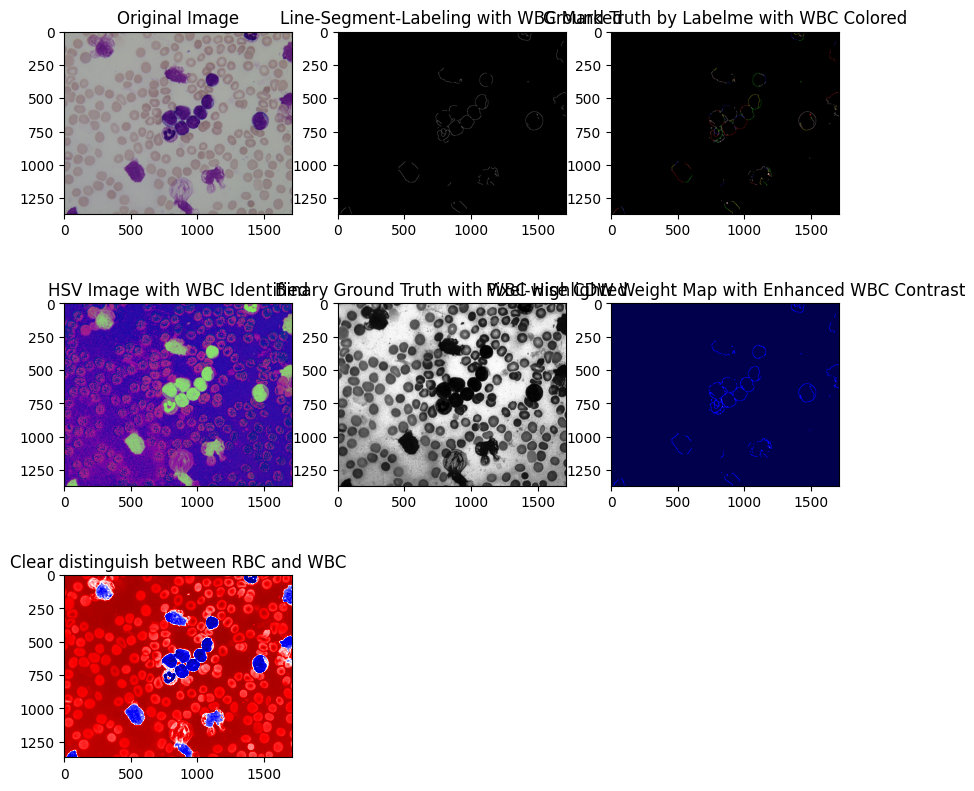

In [ ]:
# code_generate.py

import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("im1/Im001_1.jpg")

# convert to gray scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)

# apply median filter for smoothing
blurM = cv2.medianBlur(gray, 5)
cv2.imwrite('blurM.png', blurM)

# apply gaussian filter for smoothing
blurG = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imwrite('blurG.png', blurG)

# convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imwrite('hsv_image.png', hsv_image)

# histogram equalization
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm.png', histoNorm)

# create a CLAHE object for
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)
cv2.imwrite('claheNorm.png', claheNorm)


# contrast stretching
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

# Define parameters.
r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

cv2.imwrite('contrast_stretch.png', contrast_stretched)
cv2.imwrite('contrast_stretch_blurM.png',
            contrast_stretched_blurM)

# edge detection using canny edge detector
edge = cv2.Canny(gray, 100, 200)
cv2.imwrite('edge.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite('edgeG.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite('edgeM.png', edgeM)

# Identify and color WBCs
colored_image = cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)
filled_image = image.copy()
mask = np.zeros_like(gray)

contours, _ = cv2.findContours(edgeM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
colors = [(255, 192, 203), (255, 255, 0), (255, 0, 0), (0, 0, 255), (0, 255, 0)]  # Pink, Yellow, Red, Blue, Green

for i, contour in enumerate(contours):
    color = colors[i % len(colors)]
    cv2.drawContours(colored_image, [contour], -1, color, -1)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    cv2.drawContours(filled_image, [contour], -1, color, -1)

filled_image[np.where(mask == 0)] = [255, 255, 255]  # Filling outside area with white color

# Display figures
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(3, 3, 2), plt.imshow(edgeM, cmap='gray'), plt.title('Line-Segment-Labeling with WBC Marked')
plt.subplot(3, 3, 3), plt.imshow(colored_image), plt.title('Ground Truth by Labelme with WBC Colored')
plt.subplot(3, 3, 4), plt.imshow(hsv_image), plt.title('HSV Image with WBC Identified')
plt.subplot(3, 3, 5), plt.imshow(histoNorm, cmap='gray'), plt.title('Binary Ground Truth with WBC Highlighted')
plt.subplot(3, 3, 6), plt.imshow(edge, cmap='seismic'), plt.title('Pixel-wise CDW Weight Map with Enhanced WBC Contrast')
plt.subplot(3, 3, 7), plt.imshow(gray, cmap='seismic'), plt.title('Clear distinguish between RBC and WBC')

plt.show()

In [ ]:
# code_hsv.py

import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("im1/Im001_1.jpg")

# convert to gray scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)

# apply median filter for smoothing
blurM = cv2.medianBlur(gray, 5)
cv2.imwrite('blurM.png', blurM)

# apply gaussian filter for smoothing
blurG = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imwrite('blurG.png', blurG)

# convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imwrite('hsv_image.png', hsv_image)

# histogram equalization
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm.png', histoNorm)

# create a CLAHE object for
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)
cv2.imwrite('claheNorm.png', claheNorm)


# contrast stretching
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

# Define parameters.
r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

cv2.imwrite('contrast_stretch.png', contrast_stretched)
cv2.imwrite('contrast_stretch_blurM.png',
            contrast_stretched_blurM)

# edge detection using canny edge detector
edge = cv2.Canny(gray, 100, 200)
cv2.imwrite('edge.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite('edgeG.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite('edgeM.png', edgeM)

True

In [ ]:
# code_median.py

import numpy as np
import cv2
import matplotlib.pyplot as plt

# read original image
image = cv2.imread("im1/Im001_1.jpg")

# convert to gray scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)

# apply median filter for smoothing
blurM = cv2.medianBlur(gray, 5)
cv2.imwrite('blurM.png', blurM)

# apply gaussian filter for smoothing
blurG = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imwrite('blurG.png', blurG)

# histogram equalization
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm.png', histoNorm)

# create a CLAHE object for
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)
cv2.imwrite('claheNorm.png', claheNorm)


# contrast stretching
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
	if (0 <= pix and pix <= r1):
		return (s1 / r1) * pix
	elif (r1 < pix and pix <= r2):
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

	# Define parameters.


r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

cv2.imwrite('contrast_stretch.png', contrast_stretched)
cv2.imwrite('contrast_stretch_blurM.png',
			contrast_stretched_blurM)

# edge detection using canny edge detector
edge = cv2.Canny(gray, 100, 200)
cv2.imwrite('edge.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite('edgeG.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite('edgeM.png', edgeM)

True

In [ ]:
import shutil
import os

# Define the source folder path in Google Drive
source_folder_path = '/content/drive/MyDrive/C-NMC_Leukemia/testing_data'

# Define the destination folder path in the local files of Google Colab
destination_folder_path = '/content/testing_data'

# Copy the folder and its contents from Google Drive to the local files of Google Colab
shutil.copytree(source_folder_path, destination_folder_path)

# List all files in the local folder
file_names = os.listdir(destination_folder_path)

In [ ]:
import shutil
import os

# Define the source folder path in Google Drive
source_folder_path = '/content/drive/MyDrive/C-NMC_Leukemia/training_data'

# Define the destination folder path in the local files of Google Colab
destination_folder_path = '/content/training_data'

# Copy the folder and its contents from Google Drive to the local files of Google Colab
shutil.copytree(source_folder_path, destination_folder_path)

# List all files in the local folder
file_names = os.listdir(destination_folder_path)

In [ ]:
import shutil
import os

# Define the source folder path in Google Drive
source_folder_path = '/content/drive/MyDrive/C-NMC_Leukemia/validation_data'

# Define the destination folder path in the local files of Google Colab
destination_folder_path = '/content/validation_data'

# Copy the folder and its contents from Google Drive to the local files of Google Colab
shutil.copytree(source_folder_path, destination_folder_path)

# List all files in the local folder
file_names = os.listdir(destination_folder_path)

In [35]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'leukemia-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F849724%2F1449674%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240506%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240506T193411Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D91f8fc4d8d04a2717878d3bcf9d4d63afb8aac265c869cecddb54716cb29f0d2381b638d36240f53c5374ffe6b4f2bed249b3d5acef7410b364d43d21db63550414bf96d17da7cb636d3a4fb7d2fbcacecf274b626f51377d40d724a91c631cd55f7d68b635f0a5c8711dc29a31ea7b8d6d718ddc373b55475d152504bad522c07504732720dec719b07de25bfecd86bc79ebb3ecd224ac8130655adfb2fd5b5ffc46a6280b4ada19eb38f92be57fe91e9336f7ce56408c964eb0fa880c4294cd2f10acc5a1a9acba6f93b69e6df4772fe7952bc01e60a4c262c9b0c3f2609492b9fbb67ec8bd31d9af4d22a359a0f5c7c068dddbaae0c6203add19e976c1d94'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 909211078 bytes downloaded
Downloaded and uncompressed: leukemia-classification
Data source import complete.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'leukemia-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F849724%2F1449674%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T113413Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D796debbf9168e9e25d7d44aa5765b8365ad49032f90d5e2fc729f40f2287f520d41226163879a50b8f7ae3dc978ecc0001b7810ab02d1fc90598ae6b0ddcc936c18dde8b55dde5c645384f0b063b6b033f0399f6994138969ae8ca933b70c0dbae3b6e1fbe9738e58b371b056303aea4cd383b1536987a080c555382e2a52b139743d8e172bbdc8fa1a7b0535d3205ee35d56256799efb0f616020d20f2cc5f56c25433d0de6e40cdf55efb902c5a146b6efe9d8eac7215d4cf9f3fc75da48320437ca8490829ad9185acd7e4041dfc7d1aeaea76b26bc529a5392d1a2d7207da54c624501e877bcaa29b8041336a916e914734850e6a38548774fcae9914784'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 909211078 bytes downloaded
Downloaded and uncompressed: leukemia-classification
Data source import complete.


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# Import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
print('Modules loaded')


Modules loaded


In [ ]:
# Generate data paths with labels
def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)

        for fold_ in filelist:
            foldpath_ = os.path.join(foldpath, fold_)
            filelist_ = os.listdir(foldpath_)

            for file_ in filelist_:
                fpath = os.path.join(foldpath_, file_)
                filepaths.append(fpath)
                labels.append(fold_)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


# Function that create dataframe for train, validation, and test data
def create_df(data_dir):

    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)

    strat = df['labels']
    train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=123, stratify=strat)

    # test dataframe
    strat = dummy_df['labels']
    valid_df, test_df= train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=123, stratify=strat)

    return train_df, valid_df, test_df

In [ ]:
def create_model_data (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [ ]:
def plot_label_count(df, plot_title):
    '''
    This function take df and plot labels value counts
    '''

    # Define needed variables
    vcounts = df['labels'].value_counts()
    labels = vcounts.keys().tolist()
    values = vcounts.tolist()
    lcount = len(labels)

    if lcount > 55:
        print('The number of labels is > 55, no plot will be produced')

    else:
        plot_labels(lcount, labels, values, plot_title)

def plot_labels(lcount, labels, values, plot_title):
    width = lcount * 4
    width = np.min([width, 20])

    plt.figure(figsize= (width, 5))

    form = {'family': 'serif', 'color': 'blue', 'size': 25}
    sns.barplot(labels, values)
    plt.title(f'Images per Label in {plot_title} data', fontsize= 24, color= 'blue')
    plt.xticks(rotation= 90, fontsize= 18)
    plt.yticks(fontsize= 18)
    plt.xlabel('CLASS', fontdict= form)
    yaxis_label = 'IMAGE COUNT'
    plt.ylabel(yaxis_label, fontdict= form)

    rotation = 'vertical' if lcount >= 8 else 'horizontal'
    for i in range(lcount):
        plt.text(i, values[i] / 2, str(values[i]), fontsize= 12,
                rotation= rotation, color= 'yellow', ha= 'center')

    plt.show()

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

In [ ]:
data_dir = '/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data'

try:
    # Get splitted data
    train_df, valid_df, test_df = create_df(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 7462 validated image filenames belonging to 2 classes.
Found 1599 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


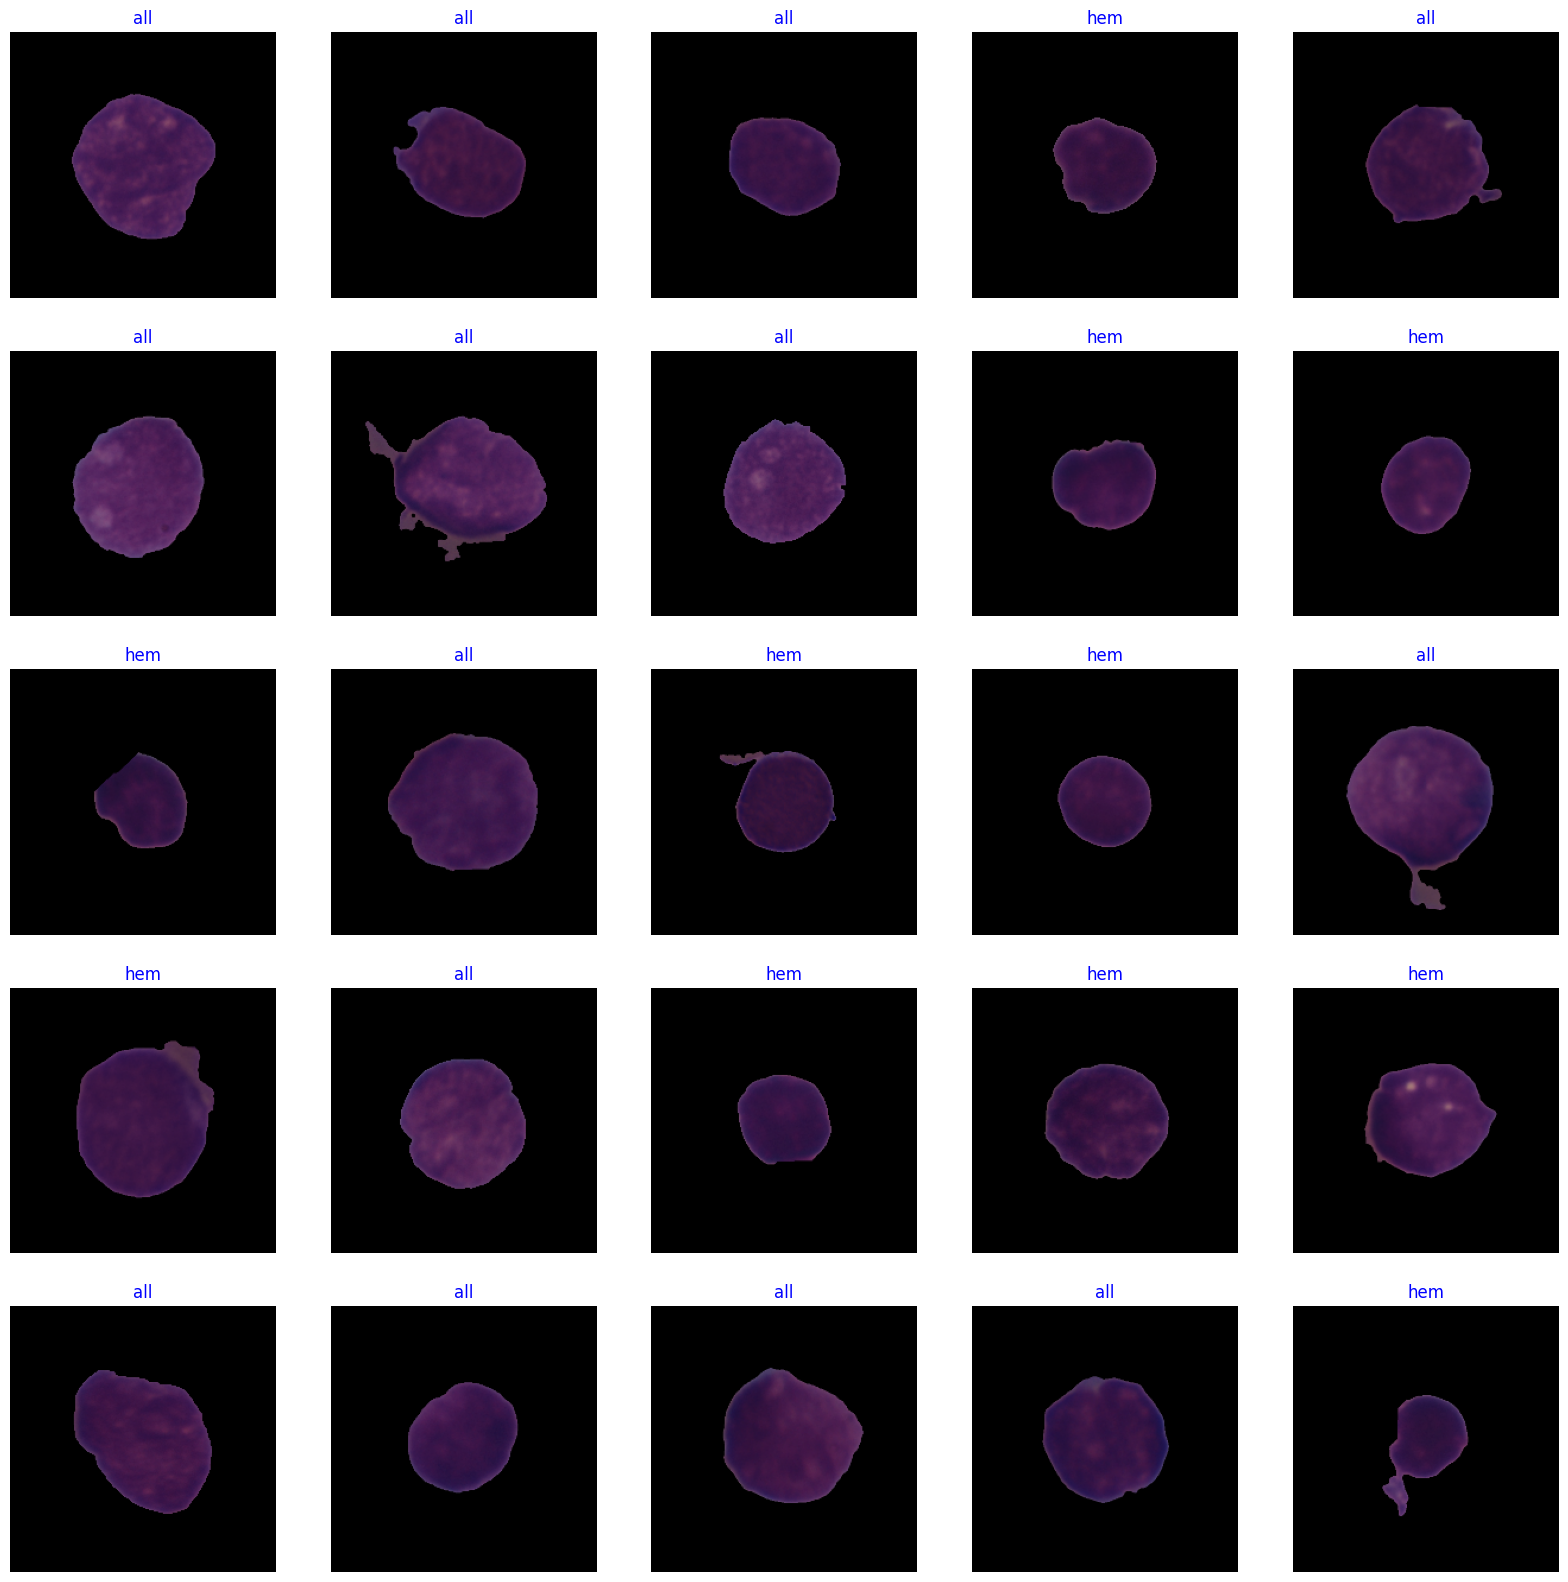

In [ ]:
show_images(train_gen)

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                         

In [ ]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [34]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
y
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


KeyboardInterrupt: 

In [ ]:
plot_training(history)

NameError: name 'history' is not defined

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

20/20 [==============================] - 15s 529ms/step - loss: 0.6193 - accuracy: 0.8944
Train Loss:  0.5852029919624329
Train Accuracy:  0.9212499856948853
--------------------
Validation Loss:  0.618956446647644
Validation Accuracy:  0.8899999856948853
--------------------
Test Loss:  0.6193123459815979
Test Accuracy:  0.8943750262260437


In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[0 0 1 ... 0 1 0]


Confusion Matrix, Without Normalization
[[977 114]
 [ 55 454]]
              precision    recall  f1-score   support

         all       0.95      0.90      0.92      1091
         hem       0.80      0.89      0.84       509

    accuracy                           0.89      1600
   macro avg       0.87      0.89      0.88      1600
weighted avg       0.90      0.89      0.90      1600



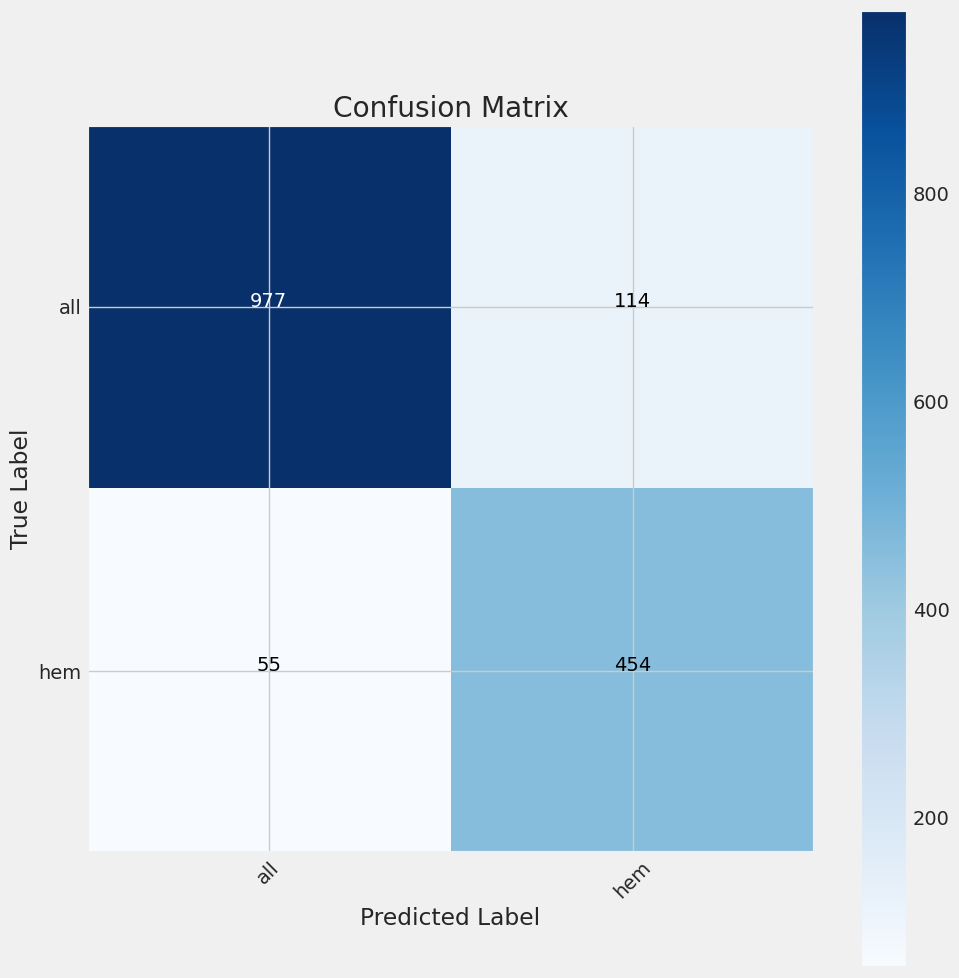

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model_name = model.input_names[0][:-6]
subject = input('Enter Project Subject')
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

Enter Project Subjectmajor
model was saved as efficientnetb3-major-89.44.h5
weights were saved as efficientnetb3-major-weights.h5


In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as major-class_dict.csv
